# Effects of Borrower Attributes on Borrower Interest Rate

## Investigation Overview

In this investigation, I wanted to look at the various attributes of borrowers that could be used to predict the rate that borrowers pay on their Prosper loans. The main focus was on these  borrower attributes: Prosper Scores, Borrower Income Range, Homeownership Status, and Income Verifiability.

## Dataset Overview

The Prosper Loan dataset consists of information on 113,937 loans from Prosper Funding LLC (the first peer-to-peer lending marketplace in the United States). This dataset holds 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income range, borrower employment status, Prosper Score and many others. Since the Prosper Score is applicable for loans that originated after July 2009, I will be using only the data from July 2009.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# data wrangling, removing loans with inconsistent or missing data.
#Since Prosper Scores fall in the range of 1 and 10, dropping rows where the Prosper Score is 11.
df.drop(index=df[df.ProsperScore == 11.0].index, inplace=True)
df.drop(index=df[df['ProsperScore'].isnull() == True].index, inplace=True)

In [5]:
# convert Income Range into ordered categorical type
ordinal_var_dict = {'IncomeRange': ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Distribution of Borrower Rates

Borrower Rate in this dataset is the interest rate that the borrowers pay for their loan. The rates range from 0.04% to 0.36%. The histogram of the rates shows a mode close to the top of the range of rates.

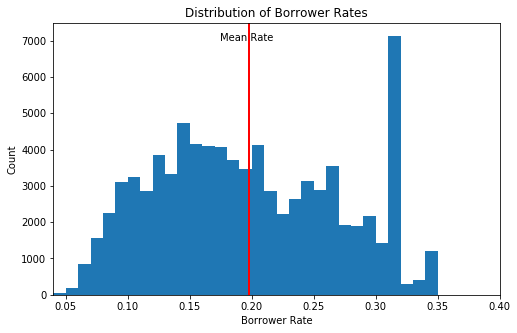

In [15]:
rate_mean = df['BorrowerRate'].mean()
plt.figure(figsize=[8, 5]);
bin_edges = np.arange(0.04, df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(df['BorrowerRate'], bins=bin_edges);
plt.xlabel('Borrower Rate');
plt.ylabel('Count');
plt.xlim(0.04, 0.4);
plt.axvline(x=rate_mean, color = 'red', linewidth=2, label='Mean'); # where the mean rate falls on the distribution
plt.text(rate_mean-0.023, 7000, 'Mean Rate');
plt.title('Distribution of Borrower Rates');

## Distribution of Prosper Scores

Each loan is assigned a custom risk score called the *Prosper Score*, which is built using historical Prosper data. The Prosper Score ranges from 1-10, with 10 being the best, or lowest risk score. This score is only available for loans originated after July 2009.

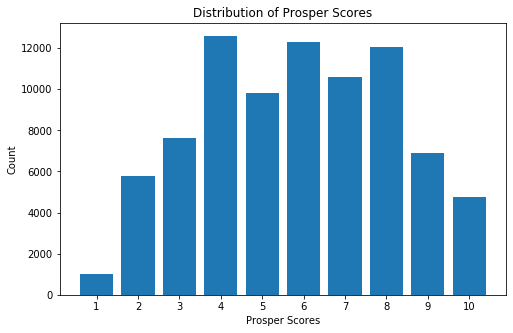

In [16]:
plt.figure(figsize=[8, 5])
heights = df['ProsperScore'].value_counts()
plt.bar(x = df['ProsperScore'].value_counts().index, height=heights);
plt.xlabel('Prosper Scores');
plt.ylabel('Count');
x_ticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks);
plt.title('Distribution of Prosper Scores');

## Mean Borrower Rate vs. Prosper Score

Plotting the mean Borrower Rate against the Prosper Score produces an inverse linear relationship. Surprisingly, the mean Borrower Rate for a Prosper Score of 5 is slightly greater than the mean Borrower Rate at a lower Prosper Score of 4.

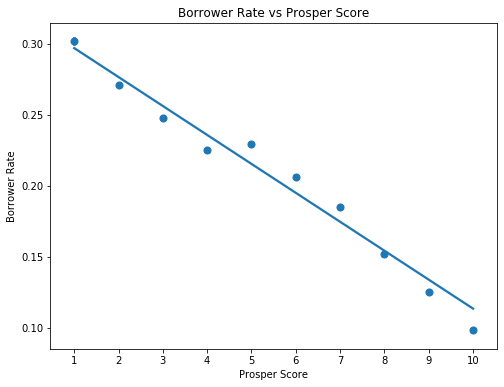

In [17]:
#Mean Borrower rate vs Prosper Scores.
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'ProsperScore', y='BorrowerRate',  x_estimator=np.mean);
plt.xlabel('Prosper Score');
plt.ylabel('Borrower Rate');
x_ticks = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks);
plt.title('Borrower Rate vs Prosper Score');

## Borrower Rate and Prosper Score by Borrower Income Range

There is an interaction effect visible between borrower rate, prosper score, and the categorical measures of Borrower's Income Range, Borrower's Homeownership status and Borrower's Income Verifiability. This is most evident for the Income Range. The average Borrower Rates are progressively lower going from the "Not Employed" to the 100K+ income range. In the case of Prosper Scores, the scores have increasingly better average Prosper Scores starting from the "Not Employed" to the 100K+ income range.

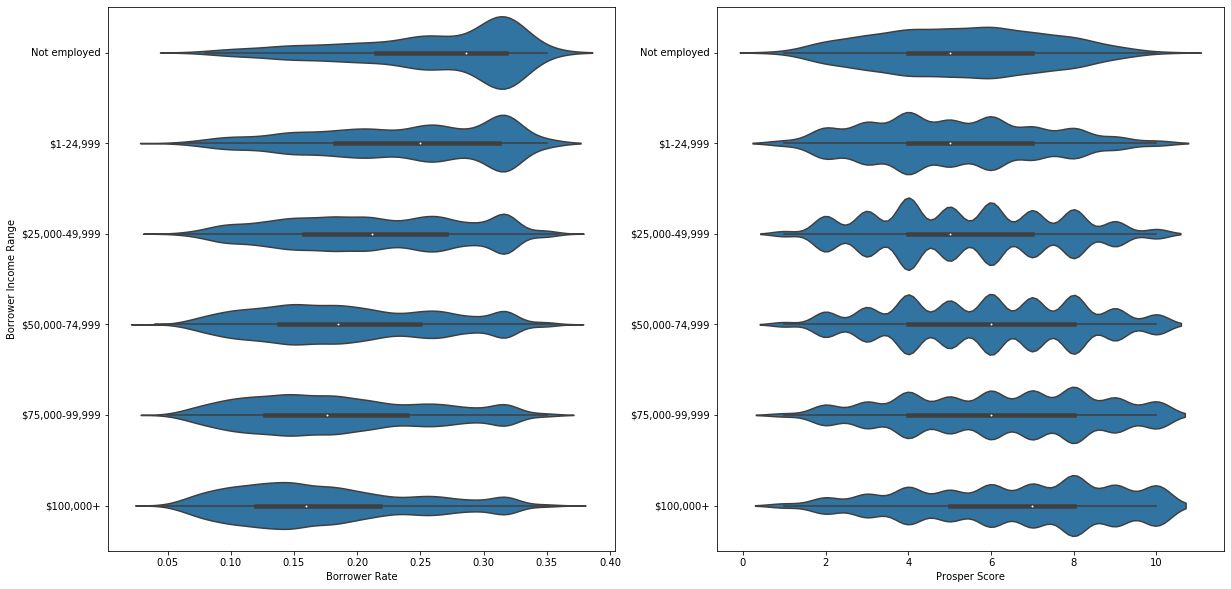

In [19]:
#Income Range vs Borrower Rate
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
sb.violinplot(data = df, y = 'IncomeRange', x = 'BorrowerRate', color=base_color);
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower Income Range');

# right plot: violin plot
plt.subplot(1, 2, 2)
sb.violinplot(data = df, y = 'IncomeRange', x = 'ProsperScore', color=base_color)
plt.xlabel('Prosper Score');
plt.ylabel('');

## Borrower Rate by Prosper Score and Homeownership Status

Now we can see how Prosper Scores and Homeownership status affect Borrower Rate. For this we are going to plot average Borrower Rate for Prosper Scores across all Income Ranges for Homeowners and non-Homeowners.

We observe that the Borrower Rate is consistently lower for Homeowners than non-Homeowners, especially at Prosper Scores of 5 & greater.

For Unemployed borrowers, the error bars in the chart show more uncertainty around the estimate of the average Borrower Rate.

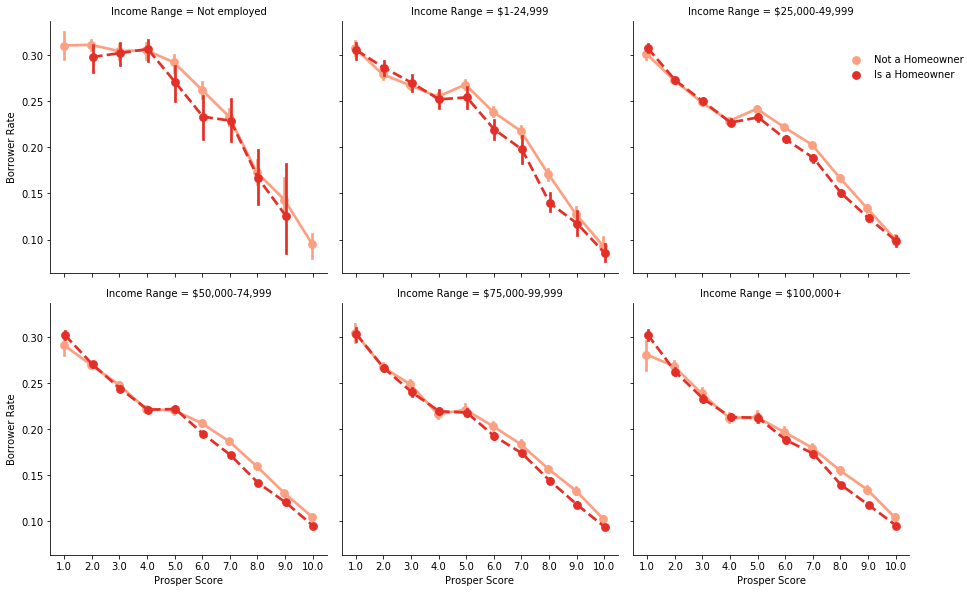

In [308]:
g = sb.catplot(x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', col = 'IncomeRange',
               data = df, kind="point", col_wrap = 3,  height = 4, dodge=True,  
               palette = 'Reds', linestyles = ['-', '--'], legend=False, legend_out=True);
g.set_titles('Income Range = {col_name}');
g.set_axis_labels('Prosper Score', 'Borrower Rate')
g.add_legend(loc='upper right', bbox_to_anchor=(1.05, 0.95));
leg = g._legend
new_labels = ['Not a Homeowner', 'Is a Homeowner']
leg.set_title('');
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
g.fig.subplots_adjust(top=1,right=0.99);
plt.show()    

## Borrower Rate by Prosper Score and Income Verifiability

Now we will observe how Prosper Scores and Income Verifiability affect the Borrower Rate. Surprisingly, the Borrower Rate for almost all Income Ranges and Prosper Scores, is equal to or lower for those borrowers whose income is not verifiable compared to those borrowers whose income is verifiable.

A point to note in these charts is that the error bars for the "Income Not Verifiable" category show more uncertainty around the estimate of the central tendency of the average borrower rate. We also observe very few data points in the "Income Verifiable" category of the "Not Employed" Income Range category, which makes sense, because, very few Borrowers will be able to provide proof of verifiable income since they are unemployed.

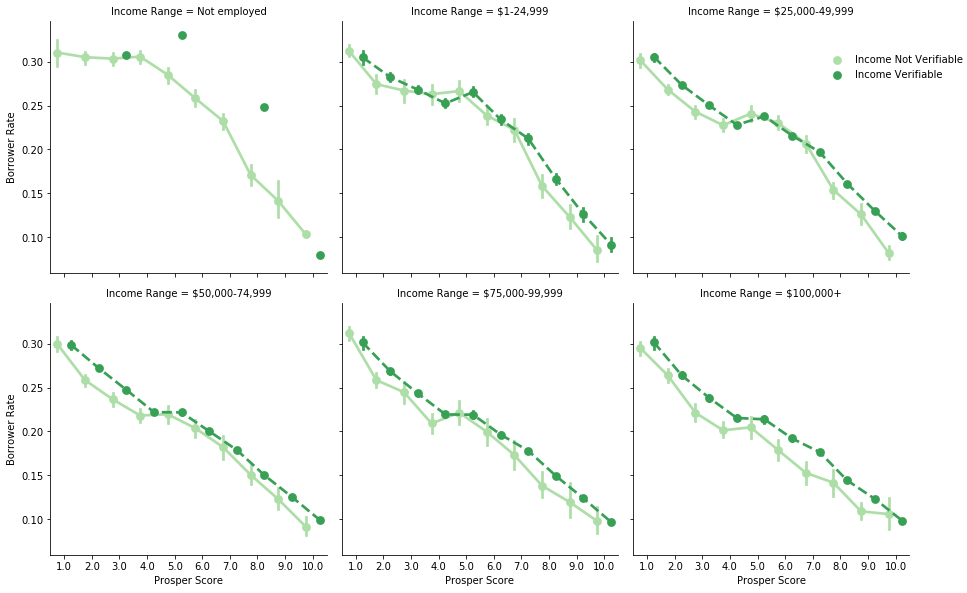

In [24]:
g = sb.catplot(x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeVerifiable', col = 'IncomeRange',
               data = df, kind="point", col_wrap = 3,  height = 4, aspect=1, dodge=0.5,  
               palette = 'Greens', linestyles = ['-', '--'], legend=False, legend_out=True);
g.set_titles('Income Range = {col_name}');
g.set_axis_labels('Prosper Score', 'Borrower Rate');
g.add_legend(loc='upper right', bbox_to_anchor=(1.05, 0.95));
leg = g._legend
new_labels = ['Income Not Verifiable', 'Income Verifiable']
leg.set_title('');
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
g.fig.subplots_adjust(top=1,right=0.99);
plt.show() 